In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv


In [2]:
df=pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")
test_df=pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")
import warnings
warnings.filterwarnings("ignore")
print(df.shape)
print(df.head(10))
print(test_df.shape)
print(test_df.head(10))

(8000, 30)
   Unnamed: 0  ID  class  20150720_N  20150602_N  20150517_N  20150501_N  \
0           0   1  water    637.5950     658.668   -1882.030   -1924.360   
1           1   2  water    634.2400     593.705   -1625.790   -1672.320   
2           3   4  water     58.0174   -1599.160         NaN   -1052.630   
3           4   5  water     72.5180         NaN     380.436   -1256.930   
4           7   8  water   1136.4400         NaN         NaN    1647.830   
5           8   9  water   1116.8600         NaN    -408.147    1685.700   
6           9  10  water   1485.7700    -223.142     727.773     180.491   
7          11  12  water   1207.3400    2833.130    -725.103    1720.860   
8          14  15  water   2250.3300     671.599     229.826    1831.990   
9          15  16  water   4568.4600    5011.310    3088.330    2260.560   

   20150415_N  20150330_N  20150314_N  ...  20140610_N  20140525_N  \
0     997.904 -1739.99000     630.087  ...         NaN   -1043.160   
1     914.19

In [3]:
print(df.isnull().sum())
test_df.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64


Unnamed: 0    0
ID            0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
test_df = test_df.drop(columns=["Unnamed: 0"])

In [6]:
df = df.drop(columns=["Unnamed: 0"])
df.columns

Index(['ID', 'class', '20150720_N', '20150602_N', '20150517_N', '20150501_N',
       '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N',
       '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N',
       '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N',
       '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N',
       '20140202_N', '20140117_N', '20140101_N'],
      dtype='object')

In [7]:
X = df.drop(columns=["ID", "class"])
y = df["class"]
y

0            water
1            water
2            water
3            water
4            water
           ...    
7995    impervious
7996    impervious
7997    impervious
7998    impervious
7999    impervious
Name: class, Length: 8000, dtype: object

In [8]:
X_test = test_df.drop(columns=["ID"])


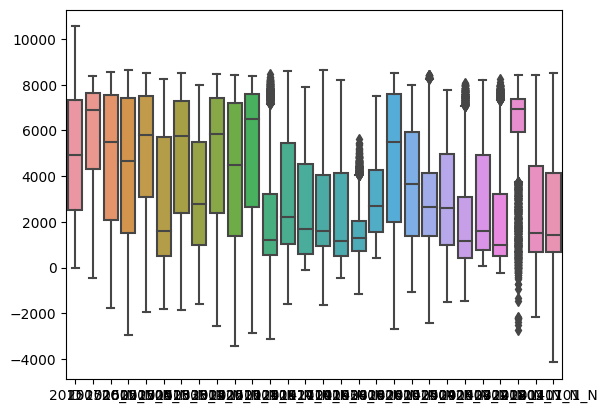

<Axes: >

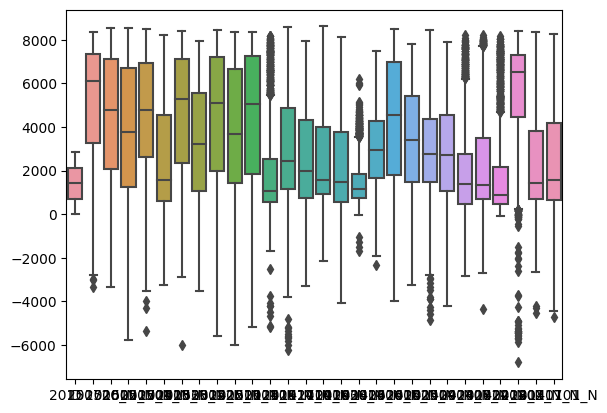

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df)
plt.show()
sns.boxplot(test_df)

In [10]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

In [11]:
X_scaled_ndvi = X_imputed / 1000.0
X_test_scaled = X_test / 1000.0

In [12]:
X_clipped = np.clip(X_scaled_ndvi, -1, 1)
X_test_clipped = np.clip(X_test_scaled, -1, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
X_final = scaler.fit_transform(X_clipped)
X_test_final = scaler.transform(X_test_clipped)

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

X_train, X_val, y_train, y_val = train_test_split(X_final, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)
model1 = LogisticRegression(multi_class='multinomial', max_iter=1000)
model1.fit(X_train, y_train)

val_acc_1 = accuracy_score(y_val, model1.predict(X_val))
pred_1 = model1.predict(X_test_final)
df=pd.DataFrame({'ID': test_df['ID'], 'class': encoder.inverse_transform(pred_1)})

In [16]:
print(f"Validation Accuracy - Model 1 (clip + scale): {val_acc_1:.4f}")
df.to_csv("SubmissionModel1.csv", index=False)

Validation Accuracy - Model 1 (clip + scale): 0.8106
